## Convolutional neural network (CNN or ConvNet) on the MNIST dataset
## Prepared by Md Kamrul Islam

## Importing libraries

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt

### Importing Data

In [2]:
data= tf.keras.datasets.mnist

In [3]:
(trainX, trainy), (testX, testy) = data.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### Observing data shape and size

In [4]:
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


## Visualizing few images

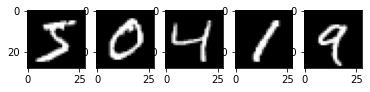

In [5]:
for i in range(5):
  plt.subplot(150+ 1 + i)
  plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

## Normalizing images

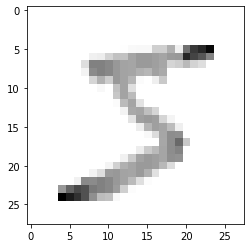

In [6]:
x_train = tf.keras.utils.normalize(trainX, axis=1)
x_test = tf.keras.utils.normalize(testX, axis=1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

### Importing necessary libraries for Convolutional Neural Networks

In [7]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout, Activation

## Resizing images

In [8]:
import numpy as np
IMG_SIZE= 28
x_trainr =np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE, 1)
x_testr =np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE, 1 )
print(x_trainr.shape,x_testr.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


## Creating a CNN model

In [9]:
model= Sequential()
# First convolation layer
model.add(Conv2D(64, (3, 3), input_shape= x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

#Second convolation layer
model.add(Conv2D(64, (3, 3), input_shape= x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

#Thrid convolation layer
model.add(Conv2D(64, (3, 3), input_shape= x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

#Fully connected layer
model.add(Flatten())
model.add (Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

## Visualizing CNN structure


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                        

## Compling model

In [12]:
 model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

## Fitting model

In [13]:
history = model.fit(x_trainr, trainy, epochs=20, batch_size=40, validation_split=0.2)

Epoch 1/20
1200/1200 [==============================] - 24s 12ms/step - loss: 0.4865 - accuracy: 0.8431 - val_loss: 0.1177 - val_accuracy: 0.9645
Epoch 2/20
1200/1200 [==============================] - 14s 11ms/step - loss: 0.1784 - accuracy: 0.9456 - val_loss: 0.0803 - val_accuracy: 0.9749
Epoch 3/20
1200/1200 [==============================] - 14s 11ms/step - loss: 0.1404 - accuracy: 0.9578 - val_loss: 0.0702 - val_accuracy: 0.9769
Epoch 4/20
1200/1200 [==============================] - 14s 12ms/step - loss: 0.1168 - accuracy: 0.9650 - val_loss: 0.0739 - val_accuracy: 0.9787
Epoch 5/20
1200/1200 [==============================] - 14s 11ms/step - loss: 0.1025 - accuracy: 0.9693 - val_loss: 0.0600 - val_accuracy: 0.9812
Epoch 6/20
1200/1200 [==============================] - 14s 11ms/step - loss: 0.0967 - accuracy: 0.9718 - val_loss: 0.0547 - val_accuracy: 0.9842
Epoch 7/20
1200/1200 [==============================] - 14s 11ms/step - loss: 0.0839 - accuracy: 0.9746 - val_loss: 0.0565 -

## Model evaluation

In [14]:
model.evaluate(x_testr, testy)

313/313 [==============================] - 2s 6ms/step - loss: 0.0349 - accuracy: 0.9903


[0.03494710847735405, 0.9902999997138977]

## Predection of test data with the model

In [15]:
pridiction = model.predict(x_testr)
print(pridiction)

[[3.3628458e-11 6.2643259e-08 3.2693993e-06 ... 9.9999416e-01
  3.9641493e-10 1.7343789e-06]
 [2.6316795e-07 7.4725278e-08 9.9999356e-01 ... 1.3707424e-06
  4.9466756e-08 1.2469920e-07]
 [3.7703721e-06 9.9997103e-01 6.5886854e-07 ... 2.1260041e-06
  5.4791140e-06 2.1165488e-06]
 ...
 [3.8093740e-11 5.5012630e-09 4.0561702e-08 ... 1.8870186e-07
  2.0626385e-06 2.0035618e-06]
 [1.5621340e-07 2.3012085e-07 3.3067914e-07 ... 3.2340655e-10
  9.4263836e-05 1.9291242e-06]
 [6.1801356e-06 2.7022259e-07 1.1971169e-06 ... 4.5644777e-09
  9.9959880e-06 2.3867665e-06]]


## Predicting an image 

In [16]:
print(np.argmax(pridiction[12])) ### I randomly predicted the 12th image 

9


### It's 9, Let's Vizualizing that image to confirm that prediction is correct

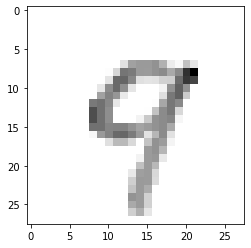

In [17]:
plt.imshow(x_test[12], cmap=plt.cm.binary)

## Yes, 12th image is 9, that means prediction is correct

## Let's visualize train loss function vs validation loss function 

## Plotting loss functions


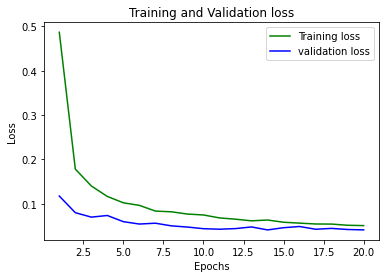

In [18]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Discussion of Results
Based on the accuracy of training, validation and test data. We can say that this CNN model is good enough to pridict hand written digits

In [19]:
from keras.models import Model
for layer in model.layers:
    if 'conv' in layer.name:
        filters, bias= layer.get_weights()
        print(layer.name, filters.shape)
        

conv2d (3, 3, 1, 64)
conv2d_1 (3, 3, 64, 64)
conv2d_2 (3, 3, 64, 64)


In [20]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

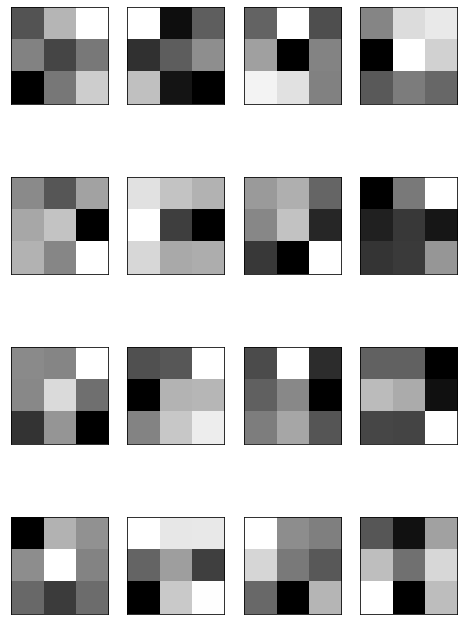

In [21]:
# plot filters

fig1=plt.figure(figsize=(8, 12))
columns = 4
rows = 4
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show() 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                             

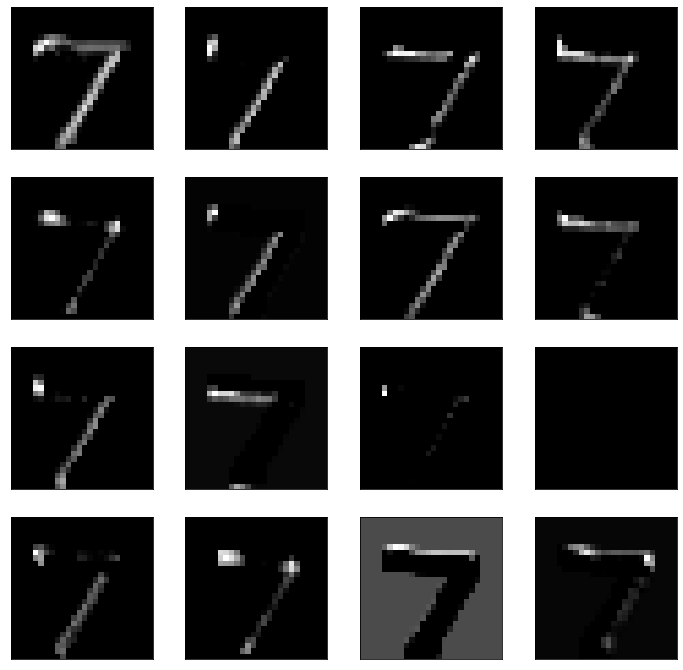

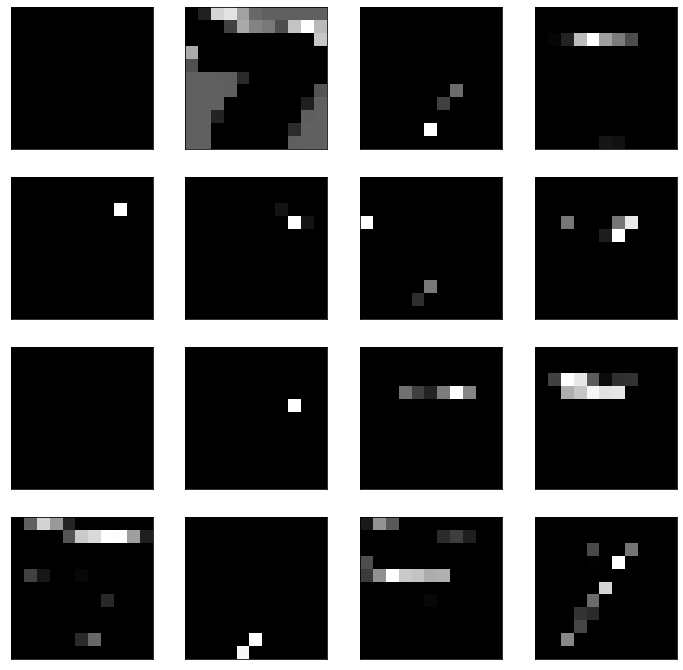

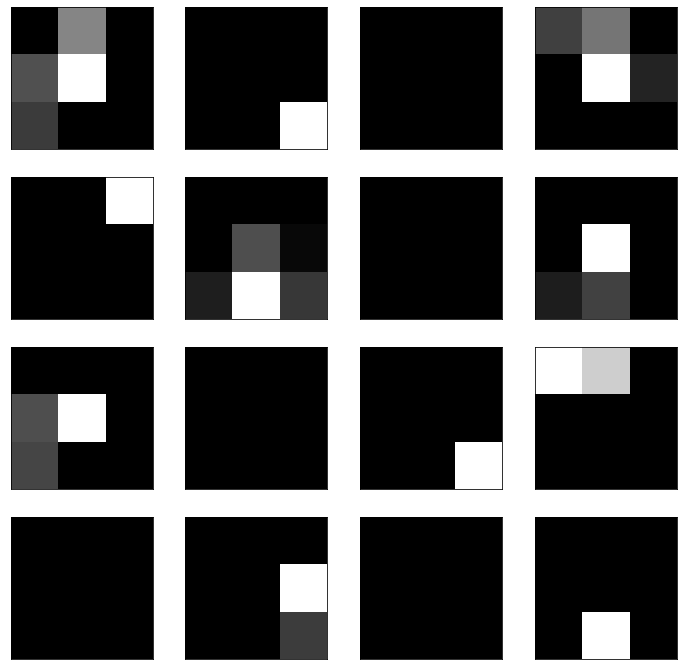

In [22]:
#### Now plot filter outputs    

#Define a new truncated model to only include the conv layers of interest
#conv_layer_index = [1, 5, 9]
conv_layer_index = [1, 5, 9]  #TO define a shorter model
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())
feature_output = model_short.predict(x_test)
columns = 4
rows = 4
for ftr in feature_output:
    #pos = 1
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        #pos += 1
    plt.show()

# Tring to detect my handwritten image:

Let's import my handwritting image from google grive to colab, I used google colab, if you want you try with your comupter jupyter notebook

In [23]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [24]:
import cv2

In [25]:
img = cv2.imread("/content/drive/MyDrive/Colabfolder/mywritten.png")

Let's visualize that digit

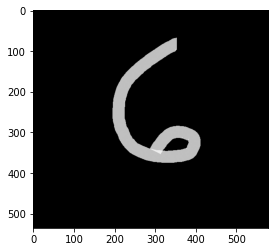

In [26]:
plt.imshow(img)

In [27]:
img.shape ### It was 6, with three diminestional as it is color image

(535, 579, 3)

Let's change the dimension and size of the image

In [28]:
grayimg= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
grayimg.shape

(535, 579)

In [29]:
resizedimg= cv2.resize(grayimg, (28,28), interpolation = cv2.INTER_AREA)
resizedimg.shape

(28, 28)

In [30]:
newimage = tf.keras.utils.normalize(resizedimg, axis= 1)
newimg = np.array(newimage).reshape(-1, IMG_SIZE,IMG_SIZE, 1)
newimg.shape

(1, 28, 28, 1)

In [31]:
myimage = model.predict(newimg)
myimage

array([[2.9291756e-05, 5.1886354e-07, 1.0950118e-06, 3.8484012e-07,
        3.3536996e-04, 2.0512333e-04, 9.9937397e-01, 8.6168486e-09,
        2.5787760e-05, 2.8429396e-05]], dtype=float32)

Based on the probability value, it should be six, Let's print it

In [32]:
print(np.argmax(myimage))

6


## Conclusion:
This model can successfully detect my hand written digit as well. Based on overall accuracy and the loss function graph. It is a good CNN model to detect hand written digits images 